In [20]:
# ARIMA Time Series Pipeline Execution
# Este notebook ejecuta secuencialmente todos los pasos del pipeline ARIMA

# Importaciones necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [21]:
# Asegurarse de que podemos importar desde la raíz del proyecto
# (ajusta esto si es necesario según la estructura de tu proyecto)
sys.path.append('..')

In [22]:
# Paso 0 Extracción de series temporales
print("Ejecutando paso 0: Extracción de series temporales")
%run ../pipelines/time_series/arima_step_0_prepare_datasets.py

2025-05-02 13:13:07 [INFO] Time Series Processor with Date Verification
2025-05-02 13:13:07 [INFO] Running from notebook with default configuration
2025-05-02 13:13:07 [INFO] === Inicio: procesamiento de inventario ===
2025-05-02 13:13:07 [INFO] Cargando inventario desde: ..\pipelines\full_consolidated_inventory.xlsx
2025-05-02 13:13:07 [INFO] Inventario cargado con éxito: 38 filas
2025-05-02 13:13:07 [INFO] Instrumentos detectados (3): ['SP500', 'EURUSD', 'USDJPY']
2025-05-02 13:13:07 [INFO] --- Procesando instrumento: SP500 ---
2025-05-02 13:13:07 [INFO] Processing data for instrument: SP500
2025-05-02 13:13:07 [INFO] Found 13 raw data columns for SP500 (excluding volume/lag)
2025-05-02 13:13:07 [INFO] Reading file: C:\Users\natus\Documents\Trabajo\PEDRO_PEREZ\Proyecto_Mercado_de_Valores\SP500_INDEX_Analisis\data\0_raw\index_pricing\S&P500_Index.csv
2025-05-02 13:13:07 [INFO] CSV read successfully with encoding=utf-8, sep=','
2025-05-02 13:13:07 [INFO] File read successfully: S&P500_

Ejecutando paso 0: Extracción de series temporales


2025-05-02 13:13:07 [INFO] Reading file: C:\Users\natus\Documents\Trabajo\PEDRO_PEREZ\Proyecto_Mercado_de_Valores\SP500_INDEX_Analisis\data\0_raw\exchange_rate\EUR_USD_Spot.csv
2025-05-02 13:13:07 [INFO] CSV read successfully with encoding=utf-8, sep=','
2025-05-02 13:13:07 [INFO] File read successfully: EUR_USD_Spot.csv (2958 rows x 7 columns)
2025-05-02 13:13:07 [INFO] Column 'date' found as 'Date' (case-insensitive)
2025-05-02 13:13:07 [INFO] Parsing dates for file: EUR_USD_Spot.csv
2025-05-02 13:13:07 [INFO] Sample date values from EUR_USD_Spot.csv:
2025-05-02 13:13:07 [INFO]   Sample 1: '05/02/2025'
2025-05-02 13:13:07 [INFO]   Sample 2: '05/01/2025'
2025-05-02 13:13:07 [INFO]   Sample 3: '04/30/2025'
2025-05-02 13:13:07 [INFO] Auto-detected format for EUR_USD_Spot.csv: American (MM/DD/YYYY)
2025-05-02 13:13:07 [INFO] Date conversion success rate for EUR_USD_Spot.csv: 100.00%
2025-05-02 13:13:07 [INFO] Reading file: C:\Users\natus\Documents\Trabajo\PEDRO_PEREZ\Proyecto_Mercado_de_

In [23]:
# Paso 1: Extracción de series temporales
print("Ejecutando paso 1: Preparacion de datos para entrenar")
%run ../pipelines/time_series/arima_step_1_prepare_datasets.py



2025-05-02 13:13:29 [INFO]  Iniciando preparación de datos para modelos ARIMA/SARIMAX con transformaciones inversas mejoradas
2025-05-02 13:13:29 [INFO] Procesando SP500 con ..\data\1_preprocess_ts\SP500_business_days.csv
2025-05-02 13:13:29 [INFO]  Procesando SP500
2025-05-02 13:13:29 [INFO] CSV leído: SP500_business_days.csv (enc=utf-8, sep=',')
2025-05-02 13:13:29 [INFO] Limpieza SP500: eliminado separadores de miles en sp500_close
2025-05-02 13:13:29 [INFO] Limpieza SP500: eliminado separadores de miles en sp500_open
2025-05-02 13:13:29 [INFO] Limpieza SP500: eliminado separadores de miles en sp500_high
2025-05-02 13:13:29 [INFO] Limpieza SP500: eliminado separadores de miles en sp500_low
2025-05-02 13:13:29 [INFO] Aplicada limpieza especial de formato para SP500
2025-05-02 13:13:29 [INFO] Convertida a numérica: sp500_close (NaN: 45)
2025-05-02 13:13:29 [INFO] Convertida a numérica: sp500_open (NaN: 45)
2025-05-02 13:13:29 [INFO] Convertida a numérica: sp500_high (NaN: 45)
2025-05-

Ejecutando paso 1: Preparacion de datos para entrenar


2025-05-02 13:13:29 [INFO] Log: unemployment_raw + inversa exp
2025-05-02 13:13:29 [INFO] Log: ism_manufacturing_raw + inversa exp
2025-05-02 13:13:29 [INFO] Log: michigan_sentiment_raw + inversa exp
2025-05-02 13:13:29 [INFO] Log: cpi_yoy_lag1m + inversa exp
2025-05-02 13:13:29 [INFO] Log: unemployment_lag1m + inversa exp
2025-05-02 13:13:29 [INFO] Aplicando diferenciación selectiva con inversas mejoradas...
C:\Users\natus\Documents\Trabajo\PEDRO_PEREZ\Proyecto_Mercado_de_Valores\SP500_INDEX_Analisis\pipelines\time_series\arima_step_1_prepare_datasets.py:285: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  # Aplicar rezago
2025-05-02 13:13:30 [INFO] Valor inicial para sp500_close: 1.832 en 2014-01-02 00:00:00
2025-05-02 13:13:30 [INFO] Inversión simple (cumsum): sp500_close -> sp500_close_d1_inv
2025-05-02 13:13:30 [INFO] Validación del primer valor de sp500_close: 

In [5]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Paso 2: Análisis de estacionariedad
print("Ejecutando paso 2: training")
%run ../pipelines/time_series/arima_step_2_train.py



2025-04-20 11:10:39,111 - __main__ - INFO - Logging configurado en c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\logs\arima_train_20250420_111039.log
2025-04-20 11:10:39,114 - __main__ - INFO - Iniciando entrenamiento de modelos con método: hybrid
2025-04-20 11:10:39,116 - __main__ - INFO - Procesando 3 instrumentos en paralelo con None workers
2025-04-20 11:10:39,117 - __main__ - INFO - Procesando instrumento: SP500 [instrument=SP500]
2025-04-20 11:10:39,119 - __main__ - INFO - Procesando SP500 - ARIMA [instrument=SP500 | model_type=ARIMA]
2025-04-20 11:10:39,119 - __main__ - INFO - Archivo encontrado: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\1_preprocess_ts\SP500\SP500_ARIMA.csv [instrument=SP500 | model_type=ARIMA]
2025-04-20 11:10:39,134 - __main__ - INFO - Datos cargados: 3008 filas, 1 columnas [instrument=SP500 | model_type=ARIMA]
2025-04-20 11:10:39,137 - __main__ - INFO - Datos divididos: Training=2252, Validation=504, Test=

Ejecutando paso 2: training


2025-04-20 11:10:39,406 - __main__ - INFO - Órdenes de integración determinados: d=0, D=1
2025-04-20 11:10:39,407 - __main__ - INFO - Utilizando método híbrido (auto_arima + Optuna) para búsqueda de hiperparámetros [model_type=ARIMA]
2025-04-20 11:10:39,407 - __main__ - INFO - Iniciando búsqueda con auto_arima (seasonal=False)
2025-04-20 11:10:43,627 - __main__ - INFO - auto_arima sugiere: order=(2, 0, 0), seasonal_order=None
2025-04-20 11:10:44,559 - __main__ - INFO - RMSE inicial en validación: 0.0105 [model_type=ARIMA]
2025-04-20 11:10:44,562 - __main__ - INFO - Iniciando refinamiento con Optuna [model_type=ARIMA]
[I 2025-04-20 11:10:44,565] A new study created in memory with name: no-name-3f33539b-dd60-4a74-bc75-4b8cdb823be5
[I 2025-04-20 11:10:47,321] Trial 0 finished with value: 0.014840103602771163 and parameters: {'p': 2, 'q': 1}. Best is trial 0 with value: 0.014840103602771163.
[I 2025-04-20 11:10:49,468] Trial 1 finished with value: 0.014840119113865718 and parameters: {'p':

In [43]:
# Paso 3: Selección de variables exógenas
print("Ejecutando paso 3: arima_step_3_ensemble")
%run ../pipelines/time_series/arima_step_3_ensemble.py



2025-04-20 10:34:54,159 - INFO - Logging configurado en logs\arima_ensemble_20250420_103454.log
2025-04-20 10:34:54,160 - INFO - Iniciando proceso de ensemble de modelos ARIMA/SARIMAX
2025-04-20 10:34:54,259 - INFO - Archivo consolidado cargado: 30474 filas
2025-04-20 10:34:54,266 - INFO - Predicciones cargadas para SP500_ARIMA: 21 filas


Ejecutando paso 3: arima_step_3_ensemble


2025-04-20 10:34:54,274 - INFO - Predicciones cargadas para SP500_SARIMAX_BASIC: 21 filas
2025-04-20 10:34:54,283 - INFO - Predicciones cargadas para SP500_SARIMAX_EXTENDED: 21 filas
2025-04-20 10:34:54,288 - INFO - Métricas cargadas para SP500_ARIMA
2025-04-20 10:34:54,291 - INFO - Métricas cargadas para SP500_SARIMAX_BASIC
2025-04-20 10:34:54,293 - INFO - Métricas cargadas para SP500_SARIMAX_EXTENDED
2025-04-20 10:34:54,297 - INFO - Pesos calculados para SP500: {'ARIMA': 0.2381939717446998, 'SARIMAX_BASIC': 0.38746532017290763, 'SARIMAX_EXTENDED': 0.3743407080823925}
2025-04-20 10:34:54,311 - INFO - Ensemble creado para SP500: 21 puntos de predicción
2025-04-20 10:34:54,429 - INFO - Archivo consolidado cargado: 30474 filas
2025-04-20 10:34:54,447 - INFO - Datos históricos guardados para visualizaciones: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\2_trainingdata_ts\SP500\SP500_historical.pkl
2025-04-20 10:34:54,579 - INFO - Archivo consolidado cargado: 304

In [44]:
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable


2025-04-20 10:35:19,602 - INFO - Iniciando preparación de salida y generación de reportes
2025-04-20 10:35:19,606 - INFO - Leyendo archivo: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\all_models_with_ensemble.csv
2025-04-20 10:35:19,676 - INFO - Archivo leído correctamente: 30537 filas, 9 columnas
2025-04-20 10:35:19,677 - INFO - Generando versiones para diferentes consumidores...


Ejecutando paso 4: Selección de orden ARIMA


2025-04-20 10:35:20,512 - INFO -  CSV para Power BI (formato español) guardado en: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\archivo_para_powerbi.csv
2025-04-20 10:35:22,118 - INFO -  JSON para API guardado en: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\predictions_api.json
2025-04-20 10:35:22,243 - INFO -  Resumen ejecutivo guardado en: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\resumen_ejecutivo.xlsx
2025-04-20 10:35:22,349 - INFO -  Resumen de forecast guardado en: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\resumen_forecast.xlsx
2025-04-20 10:35:22,350 - INFO - Verificando disponibilidad de generación de reportes avanzados...
2025-04-20 10:35:22,350 - INFO - Módulo de reportes avanzados disponible, generando reportes...
2025-04-20 10:35:22,353 - INFO - Generando reportes avanzados...
2025-04-20 10:35:22,374 - INFO - Generand

Error generando gráficos de pronóstico: 'dict' object has no attribute 'iloc'
Error generando informe HTML: 'builtin_function_or_method object' has no attribute '2025-03-28'


2025-04-20 10:35:31,305 - INFO - Generados 6 reportes para SP500
2025-04-20 10:35:31,306 - INFO - Generando reportes para USDJPY...


Error generando gráficos de pronóstico: 'dict' object has no attribute 'iloc'
Error generando informe HTML: 'builtin_function_or_method object' has no attribute '2025-03-28'


2025-04-20 10:35:35,018 - INFO - Generados 6 reportes para USDJPY
2025-04-20 10:35:35,080 - INFO - Generado resumen ejecutivo en c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\reports\resumen_ejecutivo.xlsx
2025-04-20 10:35:35,083 - INFO -  Proceso de preparación de salida y generación de reportes completado


Error generando gráficos de pronóstico: 'dict' object has no attribute 'iloc'
Error generando informe HTML: 'builtin_function_or_method object' has no attribute '2025-03-28'

 Proceso completado. Archivos generados:
   - PowerBI: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\archivo_para_powerbi.csv
   - API: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\predictions_api.json
   - Resumen Ejecutivo: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\resumen_ejecutivo.xlsx
   - Resumen Forecast: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\resumen_forecast.xlsx
   - Reportes avanzados:
     * EURUSD: 6 reportes
     * SP500: 6 reportes
     * USDJPY: 6 reportes
     * executive_summary: 1 reportes


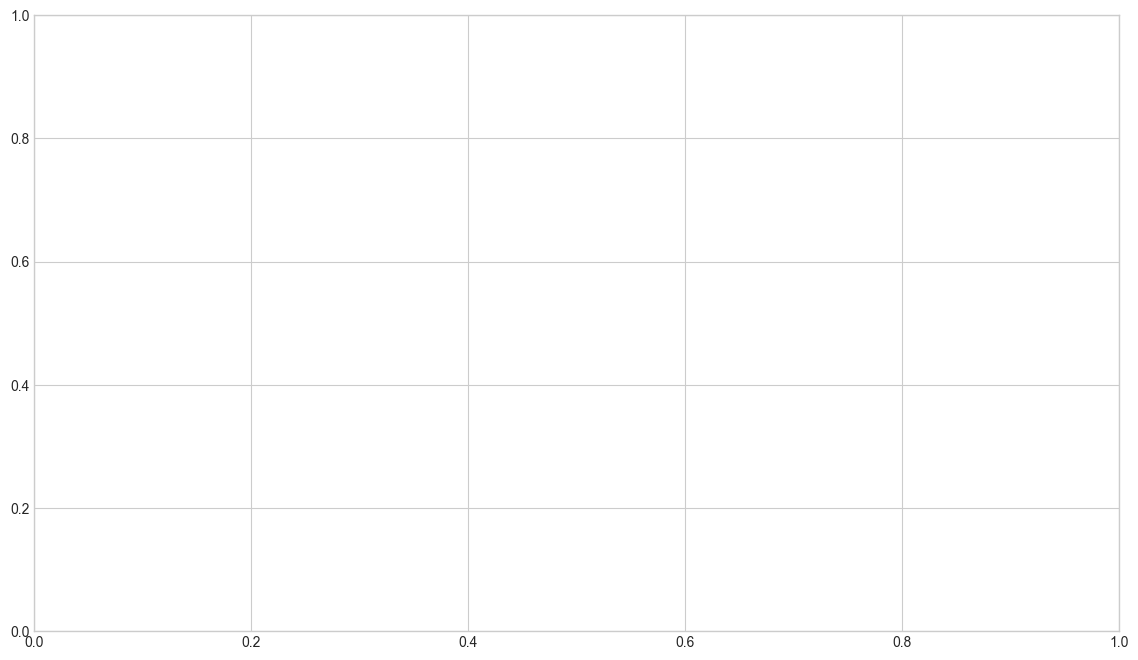

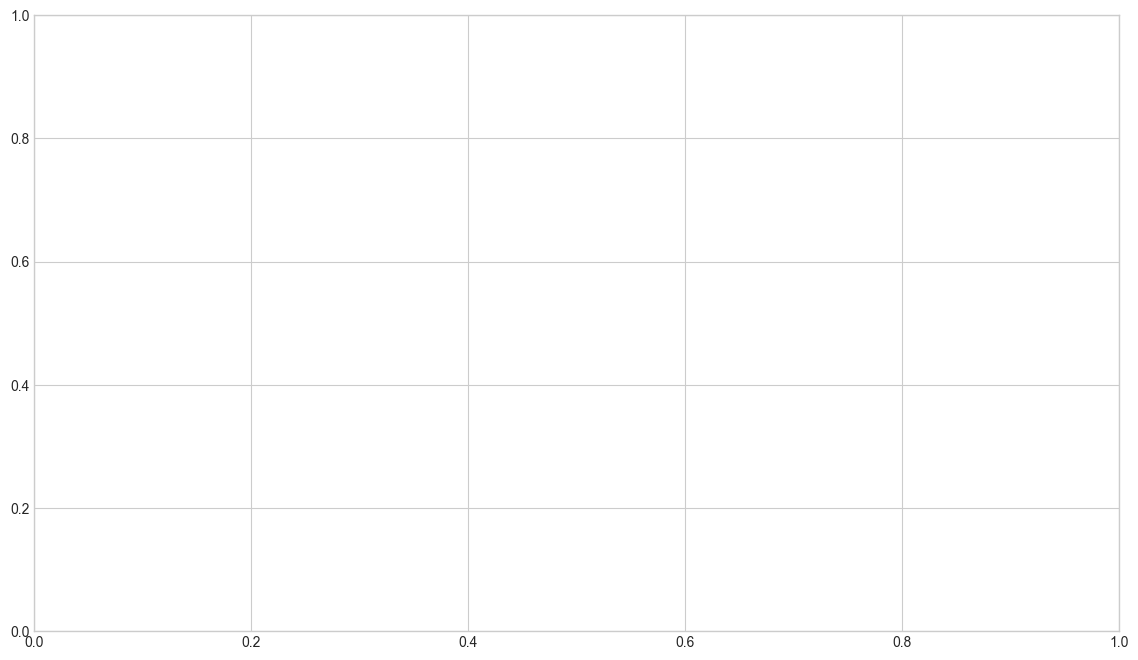

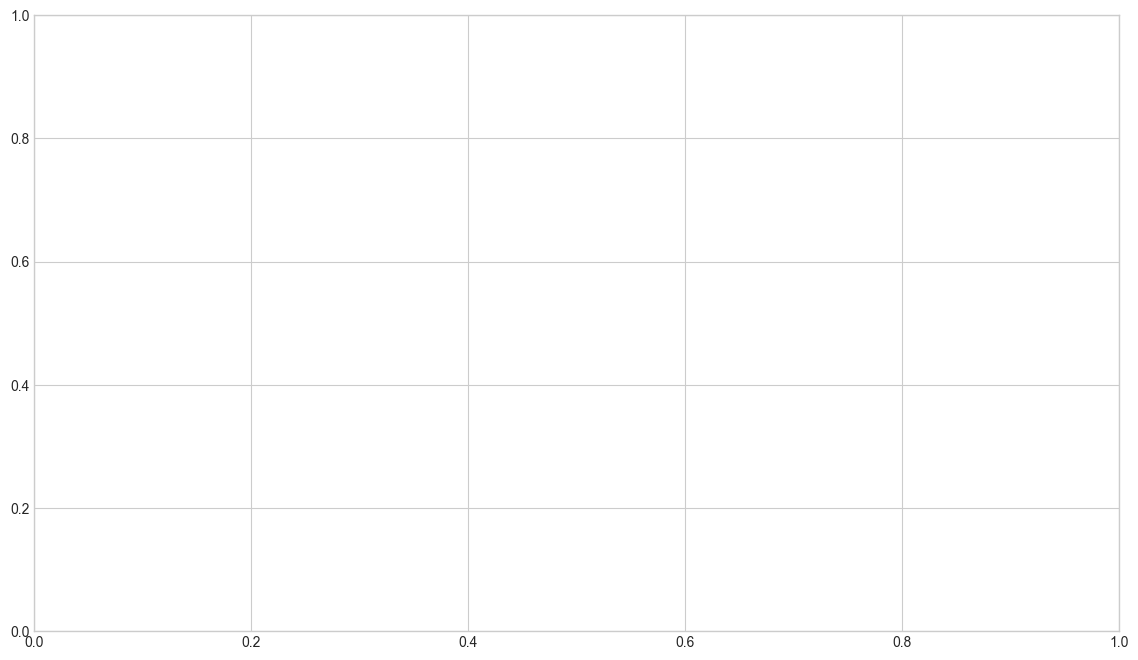

In [45]:
# Paso 4: Selección de orden ARIMA
print("Ejecutando paso 4: Selección de orden ARIMA")
%run ../pipelines/time_series/arima_step_4_prepare_output.py



In [46]:

# Paso 5: Entrenamiento del modelo
print("Ejecutando paso 5: backtest")
%run ../pipelines/time_series/arima_step_5_backtest.py


2025-04-20 10:35:35,930 - INFO - Módulo de visualizaciones avanzadas cargado correctamente
2025-04-20 10:35:35,935 - INFO - Iniciando proceso de backtesting
2025-04-20 10:35:35,937 - INFO - Utilizando visualizaciones avanzadas
2025-04-20 10:35:35,939 - INFO - Usando archivo de predicciones: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\all_models_with_ensemble.csv
2025-04-20 10:35:35,941 - INFO - Cargando archivo: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\4_results\all_models_with_ensemble.csv
2025-04-20 10:35:36,010 - INFO - Archivo cargado: 30537 filas, 9 columnas
2025-04-20 10:35:36,046 - INFO - Datos filtrados para análisis: 30285 filas
2025-04-20 10:35:36,079 - INFO - Evaluado EURUSD - ARIMA: 252 observaciones


Ejecutando paso 5: backtest


2025-04-20 10:35:36,090 - INFO - Evaluado EURUSD - SARIMAX_BASIC: 252 observaciones
2025-04-20 10:35:36,101 - INFO - Evaluado EURUSD - SARIMAX_EXTENDED: 252 observaciones
2025-04-20 10:35:36,116 - INFO - Evaluado SP500 - ARIMA: 252 observaciones
2025-04-20 10:35:36,128 - INFO - Evaluado SP500 - SARIMAX_BASIC: 252 observaciones
2025-04-20 10:35:36,137 - INFO - Evaluado SP500 - SARIMAX_EXTENDED: 252 observaciones
2025-04-20 10:35:36,147 - INFO - Evaluado USDJPY - ARIMA: 252 observaciones
2025-04-20 10:35:36,156 - INFO - Evaluado USDJPY - SARIMAX_BASIC: 252 observaciones
2025-04-20 10:35:36,165 - INFO - Evaluado USDJPY - SARIMAX_EXTENDED: 252 observaciones
2025-04-20 10:35:36,214 - INFO - Análisis por subperíodos completado para EURUSD - ARIMA: 5 períodos
2025-04-20 10:35:36,249 - INFO - Análisis por subperíodos completado para EURUSD - SARIMAX_BASIC: 5 períodos
2025-04-20 10:35:36,277 - INFO - Análisis por subperíodos completado para EURUSD - SARIMAX_EXTENDED: 5 períodos
2025-04-20 10:35


 Resultados exportados correctamente a: c:\Users\pedro\OneDrive\Documents\ALGO TRADING\SP500_INDEX_Analisis\data\5_metrics


NameError: name 'exit' is not defined